In [37]:
'''
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Files for Colab/Coimbatore Gold Rate/gold_rate_data_aug2021_jan2025.csv")

df = data.copy()
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for easier plotting
data.set_index('Date', inplace=True)
print(data)
print(df)

data['Evening_Differenced_1'] = [None] * len(data)
for i in range(1, len(data)):
    data.iloc[i,-1] = data.iloc[i,1] - data.iloc[i-1,1]

train_data = data.iloc[1:-30]
test_data = data.iloc[-30:]

train_series = pd.to_numeric(train_data['Evening_Differenced_1'], errors='coerce').dropna() # train_data.iloc[:,-1]
train_series.index.freq = pd.infer_freq(train_series.index) # 'D

test_series = pd.to_numeric(test_data['Evening_Differenced_1'], errors='coerce').dropna() # test_data.iloc[:,-1]
test_series.index.freq = pd.infer_freq(test_series.index) # 'D
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-37-608239a96101>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


            Morning  Evening
Date                        
2021-08-01     4500     4500
2021-08-02     4500     4500
2021-08-03     4490     4490
2021-08-04     4490     4490
2021-08-05     4480     4480
...             ...      ...
2025-01-12     7315     7315
2025-01-13     7340     7340
2025-01-14     7330     7330
2025-01-15     7340     7340
2025-01-16     7390     7390

[1265 rows x 2 columns]
           Date  Morning  Evening
0      1-Aug-21     4500     4500
1      2-Aug-21     4500     4500
2      3-Aug-21     4490     4490
3      4-Aug-21     4490     4490
4      5-Aug-21     4480     4480
...         ...      ...      ...
1260  12-Jan-25     7315     7315
1261  13-Jan-25     7340     7340
1262  14-Jan-25     7330     7330
1263  15-Jan-25     7340     7340
1264  16-Jan-25     7390     7390

[1265 rows x 3 columns]


In [42]:
!pip install requests-html
!pip install lxml[html_clean]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.1
    Uninstalling websockets-14.1:
      Successfully uninstalled websockets-14.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 0.3.0 requires websockets<15.0dev,>=13.0, but you have websockets 10.4 which is incompatibl

In [43]:
'''
Asynchronous tasks allow a program to handle multiple operations simultaneously without waiting for one task to complete before starting another.
This is particularly useful in scenarios where some operations involve waiting (e.g., network requests, file I/O, or database queries).

In a synchronous program, tasks are executed sequentially; one task must finish before the next begins.
Asynchronous tasks let the program perform other operations while waiting for one task to complete.

1. Non blocking execution
2. Improved Performance
3. Responsiveness
4. Efficient Resource Usage
5. Scalability
6. Parallelism

Use Cases :-
WEB SCRAPING: FETCH MULTIPLE PAGES SIMULTANEOUSLY.
Real-time Applications: Handle multiple chat messages or data streams.
API Calls: Query multiple APIs concurrently.
File Operations: Upload or download files without blocking the main program.
'''

import asyncio #For running asynchronous tasks asynchronous input output
from requests_html import AsyncHTMLSession #For making asynchronous HTTP requests
from bs4 import BeautifulSoup #For parsing and extracting HTML content
import pandas as pd #For creating and manipulating tabular data (DataFrames)

city = 'coimbatore'
# Create an asynchronous HTML session
asession = AsyncHTMLSession()
'''
The primary purpose of creating an AsyncHTMLSession object is to : enable asynchronous web scraping.
Specifically, it allows you to fetch and render HTML content from multiple URLs concurrently without blocking the program's execution while waiting for responses

Concurrent Scraping: The program scrapes data for multiple months and years without waiting for one task to finish before starting another.

1.Handle Multiple Requests Concurrently
  AsyncHTMLSession is part of the requests-html library, which supports asynchronous HTTP requests.
  Instead of waiting for one request to complete before starting another, AsyncHTMLSession allows your script to send multiple requests in parallel.
'''

# Function to fetch data for a specific month and year
async def fetch_monthly_data(month, year):
    url = f'https://www.indgold.com/{city}-gold-rate-{month}-{year}.htm'
    response = await asession.get(url)  #Sends an asynchronous GET request to the URL and waits for the response asynchronously by making the execution of rest of the code halted

    await response.html.arender(timeout=20)
    '''
    DOM - Document Object Model

    await - Since rendering is asynchronous, await allows the JavaScript to run and update the DOM, ensuring you get the final rendered content.
    response.html - It gives access to the raw HTML initially received from the server.

    The arender() asynchronous method executes any JavaScript code on the page and waits for the DOM to update.
    After rendering, response.html.html contains the updated HTML with dynamically loaded content included (e.g., data populated by JavaScript).
    The timeout=20 parameter sets a maximum waiting time of 20 seconds for the rendering process to complete.

    Rendering ensures that dynamically loaded content (added or modified by JavaScript after the initial page load) becomes accessible,
    allowing you to see and scrape both static and dynamic data from a web page.
    '''

    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find all <table> elements
    tables = soup.find_all('table')

    # Check if there are at least two tables
    if len(tables) >= 2:
        target_table = tables[1]

        # Extract table rows (<tr> i.e., table rows elements) from the target table in an HTML document using BeautifulSoup.
        rows = target_table.find_all('tr')

        # Create lists to store data
        data = []

        # Loop through rows, skipping the header
        for row in rows[1:]:
            cols = row.find_all('td') # Find all <td> (table data) elements in the current row, which represent the individual cells of the row.
            data.append([col.get_text(strip=True) for col in cols])

        # Convert to DataFrame
        month_df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening'])
        #month_df['Month'] = month.capitalize() # Converts the first character of a string to uppercase and the remaining characters to lowercase
        #month_df['Year'] = year
        return month_df
    else:
        print(f"No data found for {month}-{year}")
        return pd.DataFrame(columns=['Date', 'Morning', 'Evening'])

async def fetch_all_data():
    start_year, end_year = 2021, 2023
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july','august', 'september', 'october', 'november', 'december']

    all_data = pd.DataFrame()

    for year in range(start_year, end_year + 1):
        for month in months:
            if year == 2021 and month not in ['august', 'september', 'october', 'november', 'december']:
              continue
            if year == 2023 and month == 'august':
              break

            month_data = await fetch_monthly_data(month, year)

            all_data = pd.concat([all_data, month_data], ignore_index=True)
            # The ignore_index=True parameter in pd.concat() ensures that the resulting DataFrame's index is reset and sequentially numbered, starting from 0,
            # regardless of the indices of the original DataFrames being concatenated.

    all_data.to_csv('gold_rate_data_aug2021_jul2023.csv', index=False)

await fetch_all_data()


[INFO] Starting Chromium download.
INFO:pyppeteer.chromium_downloader:Starting Chromium download.
100%|██████████| 183M/183M [00:01<00:00, 97.6Mb/s]
[INFO] Beginning extraction
INFO:pyppeteer.chromium_downloader:Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205
INFO:pyppeteer.chromium_downloader:Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205


No data found for august-2021
No data found for september-2021
No data found for october-2021
No data found for november-2021
No data found for december-2021
No data found for january-2022
No data found for february-2022
No data found for march-2022
No data found for april-2022
No data found for may-2022
No data found for june-2022
No data found for july-2022
No data found for august-2022
No data found for september-2022
No data found for october-2022
No data found for november-2022
No data found for december-2022


In [44]:
import asyncio
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import pandas as pd

# Create an asynchronous session
asession = AsyncHTMLSession()

# Function to fetch data for a specific month and year
async def fetch_monthly_data(month, year):
    url = f'https://www.indgold.com/{city}-gold-rate-{month}-{year}.htm'
    response = await asession.get(url)
    await response.html.arender(timeout=20)  # Render JavaScript content

    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Extract the <div id="table">
    table_div = soup.find('div', id='table')
    if table_div:
        # Extract table rows
        rows = table_div.find_all('tr')

        # Create lists to store data
        data = []

        # Loop through rows, skipping the header
        for row in rows[1:]:
            cols = row.find_all('td')
            data.append([col.get_text(strip=True) for col in cols])

        # Convert to DataFrame
        month_df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening'])
        #month_df['Month'] = month.capitalize()
        #month_df['Year'] = year
        return month_df
    else:
        print(f"No data found for {month}-{year}")
        return pd.DataFrame(columns=['Date', 'Morning', 'Evening', 'Month', 'Year'])

async def fetch_all_data():
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

    all_data = pd.DataFrame()

    for year in range(2023,2025):
        for month in months:
            if year == 2023 and month not in months[months.index("august"):]:
                continue

            month_data = await fetch_monthly_data(month, year)

            all_data = pd.concat([all_data, month_data], ignore_index=True)

    existing_data = pd.read_csv('gold_rate_data_aug2021_jul2023.csv')
    combined_data = pd.concat([existing_data, all_data], ignore_index=True)

    combined_data.to_csv('gold_rate_data_aug2021_dec2024.csv', index=False)

await fetch_all_data()


In [45]:
import asyncio
from requests_html import AsyncHTMLSession
from bs4 import BeautifulSoup
import pandas as pd

# Create an asynchronous session
asession = AsyncHTMLSession()

# The function to fetch data from the most recent page (assumed to contain October 2024 data)
async def fetch_month_data():
    url = f'https://www.indgold.com/{city}-gold-rate.htm'
    response = await asession.get(url)
    await response.html.arender(timeout=20)

    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Extract the <div id="table">
    table_div = soup.find('div', id='table')
    if table_div:
        # Extract table rows
        rows = table_div.find_all('tr')

        # Create lists to store data
        data = []

        # Loop through rows, skipping the header
        for row in rows[1:]:
            cols = row.find_all('td')
            row_data = [col.get_text(strip=True) for col in cols]
            #row_data.extend(['October', 2024])  # Add month and year
            data.append(row_data)

        # Convert to DataFrame with additional Month and Year columns
        df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening'])
        #df = pd.DataFrame(data, columns=['Date', 'Morning', 'Evening', 'Month', 'Year'])

        return df
    else:
        print("No <div> found with id='table'.")
        return pd.DataFrame()  # Return empty DataFrame if no data found

# Main function to fetch data and update the CSV
async def update_csv():
    this_month_data = await fetch_month_data()

    if not this_month_data.empty:
        existing_data = pd.read_csv('gold_rate_data_aug2021_dec2024.csv')

        # Append the new data
        updated_data = pd.concat([existing_data, this_month_data], ignore_index=True)

        # Save the updated data to a new CSV file
        updated_data.to_csv('gold_rate_data_aug2021_jan2025.csv', index=False)
    else:
        print("Failed to fetch this month data.")

# Run the async function
await update_csv()


In [ ]:
import pandas as pd
data = pd.read_csv("gold_rate_data_aug2021_jan2025.csv")
#print(data)

#data['Day'] = data['Date'].str.split('-').str[0].astype(int)

# Insert the 'day' column after 'evening' and before 'month'
#data.insert(data.columns.get_loc("Month"), 'Day', data.pop('Day'))


df = data.copy()
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for easier plotting
data.set_index('Date', inplace=True)
print(data)
print(df)


FileNotFoundError: [Errno 2] No such file or directory: 'gold_rate_data_aug2021_oct2024.csv'

In [ ]:
no_of_rows = len(data)
train_data = data.iloc[:no_of_rows-30,:]
test_data = data.iloc[no_of_rows-30:,:]
#print(train_data)
#print(test_data)
print(len(test_data))

30


In [ ]:
'''
Duplicates are those which have the same timestamps and the same gold rates
Normalize the data for LSTM model only

For LSTM models, Min-Max Normalization is generally the best choice because it scales the data to a specific range (commonly [0, 1] or [-1, 1]),
which helps LSTMs learn more effectively.
'''

0

In [ ]:
print(data.duplicated().sum())  # In data the date is set as index, so eventhough when the timestamp differs all those will be considered as duplicate data
print(df.duplicated().sum()) # Here Date is a separate column, so different timestamp's similar rates are not considered as duplicates

821
0


In [ ]:
Q1 = data[['Morning', 'Evening']].quantile(0.25)
Q3 = data[['Morning', 'Evening']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[['Morning', 'Evening']] < (Q1 - 1.5 * IQR)) |
            (data[['Morning', 'Evening']] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Morning    0
Evening    0
dtype: int64


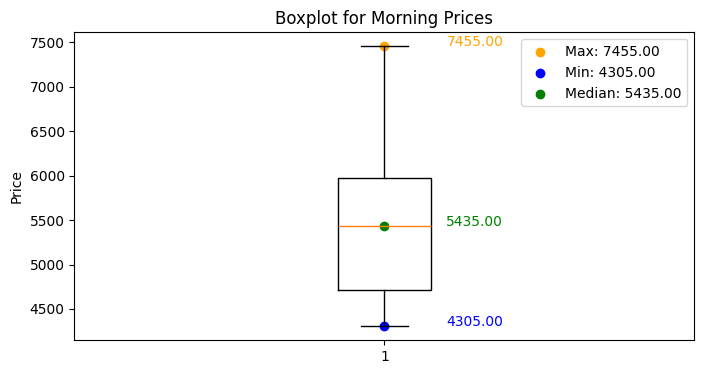

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(data['Morning'])
plt.title('Boxplot for Morning Prices')
plt.ylabel('Price')

morning_stats = data['Morning'].describe()
max_value = morning_stats['max']
min_value = morning_stats['min']
median_value = morning_stats['50%']

plt.scatter(1, max_value, label=f'Max: {max_value:.2f}', color='orange')
plt.scatter(1, min_value, label=f'Min: {min_value:.2f}', color='blue')
plt.scatter(1, median_value, label=f'Median: {median_value:.2f}', color='green')

plt.text(1.1, max_value, f'{max_value:.2f}', color='orange')
plt.text(1.1, min_value, f'{min_value:.2f}', color='blue')
plt.text(1.1, median_value, f'{median_value:.2f}', color='green')

plt.legend()
plt.show()

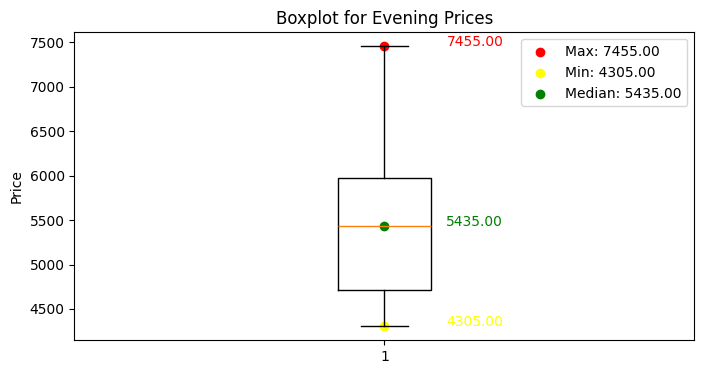

In [ ]:
plt.figure(figsize=(8, 4))
plt.boxplot(data['Evening'])
plt.title('Boxplot for Evening Prices')
plt.ylabel('Price')

evening_stats = data['Evening'].describe()
max_value = evening_stats['max']
min_value = evening_stats['min']
median_value = evening_stats['50%']

plt.scatter(1, max_value, label=f'Max: {max_value:.2f}', color='red')
plt.scatter(1, min_value, label=f'Min: {min_value:.2f}', color='yellow')
plt.scatter(1, median_value, label=f'Median: {median_value:.2f}', color='green')

plt.text(1.1, max_value, f'{max_value:.2f}', color='red')
plt.text(1.1, min_value, f'{min_value:.2f}', color='yellow')
plt.text(1.1, median_value, f'{median_value:.2f}', color='green')

plt.legend()
plt.show()


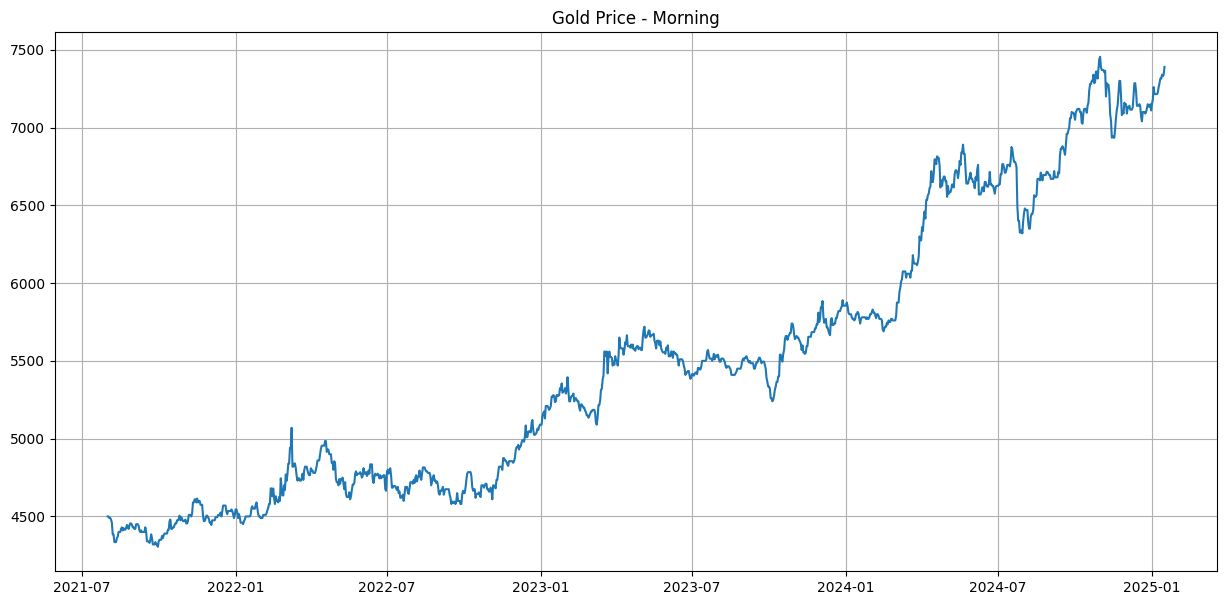

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Morning'])
plt.title('Gold Price - Morning')
plt.grid(True)
plt.show()

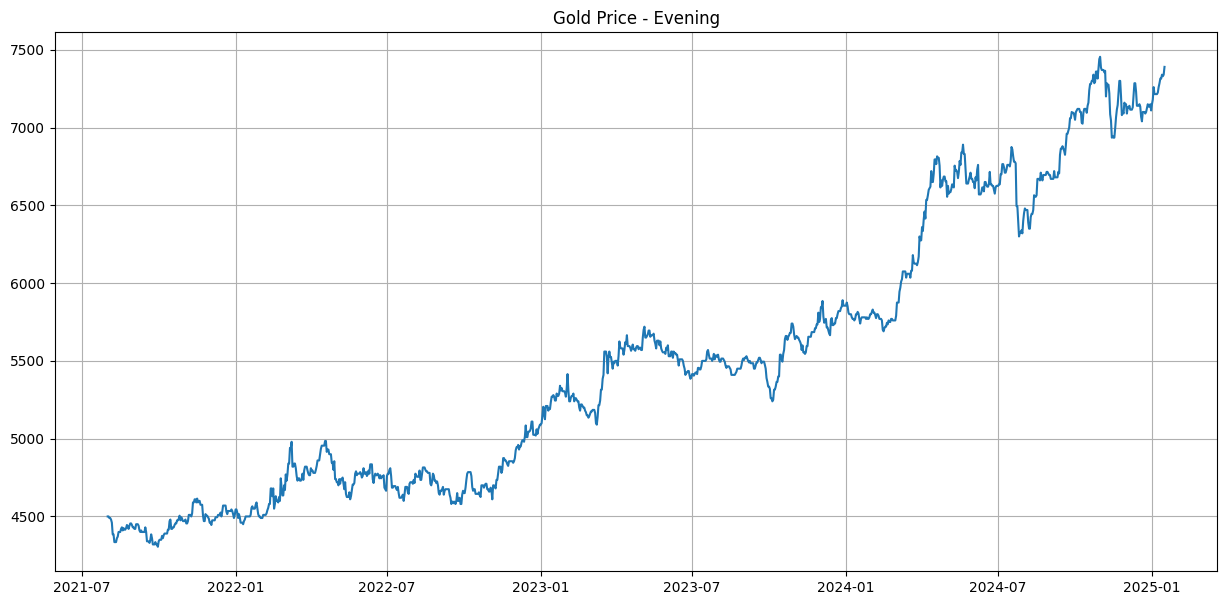

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Evening'])
plt.title('Gold Price - Evening')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Date v/s Gold Price')

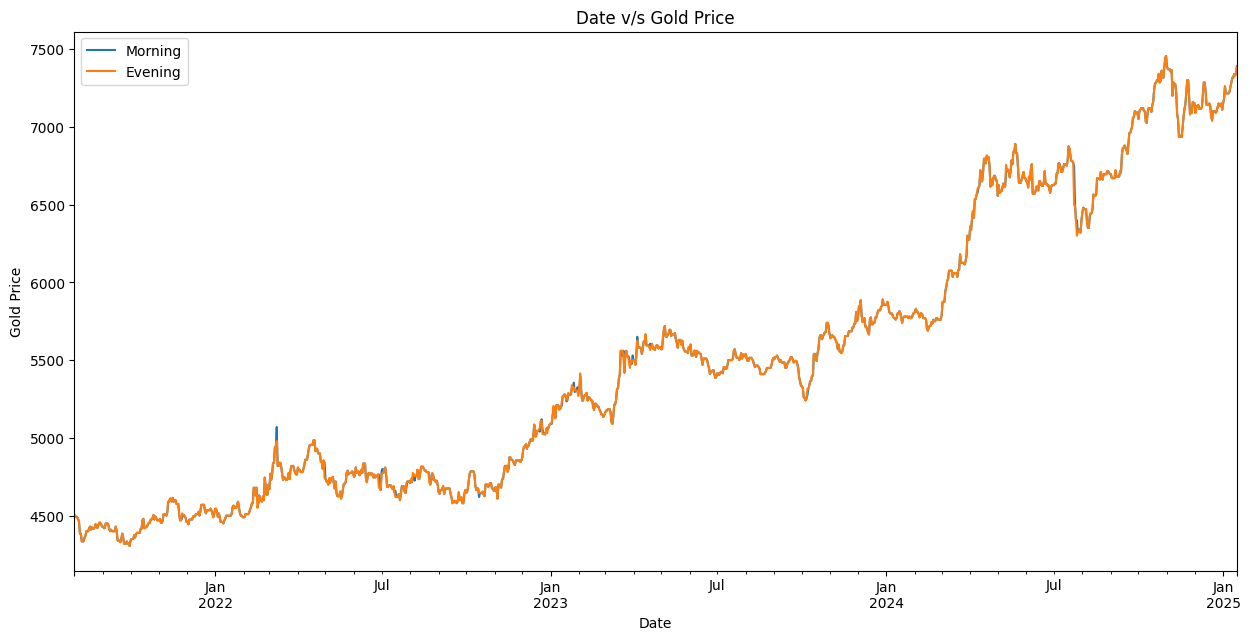

In [ ]:
data.plot(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Date v/s Gold Price")

Text(0.5, 1.0, 'Gold Price for the year 2021-22')

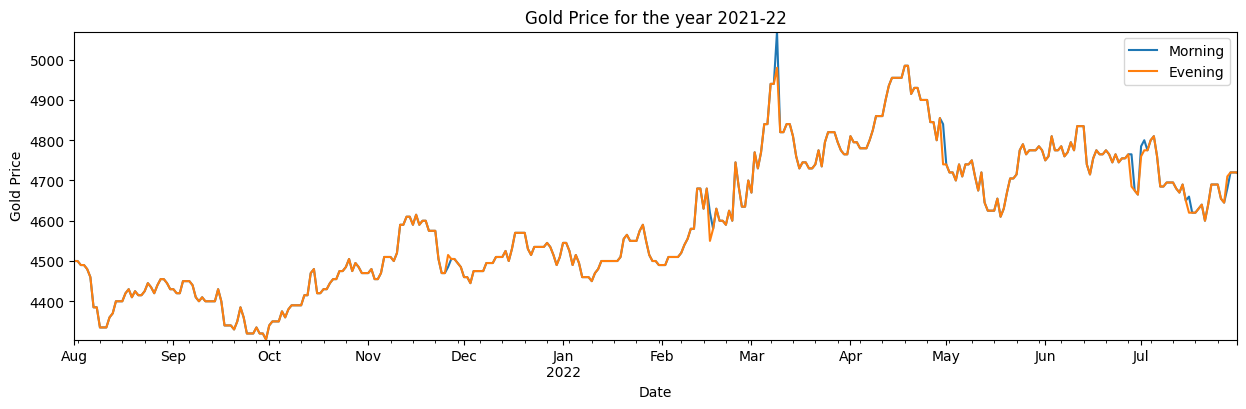

In [ ]:
min_val = min(data['Morning']['1-Aug-21':'31-Jul-22'].min(), data['Evening']['1-Aug-21':'31-Jul-22'].min())
max_val = max(data['Morning']['1-Aug-21':'31-Jul-22'].max(), data['Evening']['1-Aug-21':'31-Jul-22'].max())

data.plot(xlim=['1-Aug-21','31-Jul-22'],ylim=[min_val,max_val],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for the year 2021-22")

Text(0.5, 1.0, 'Gold Price for the year 2022-23')

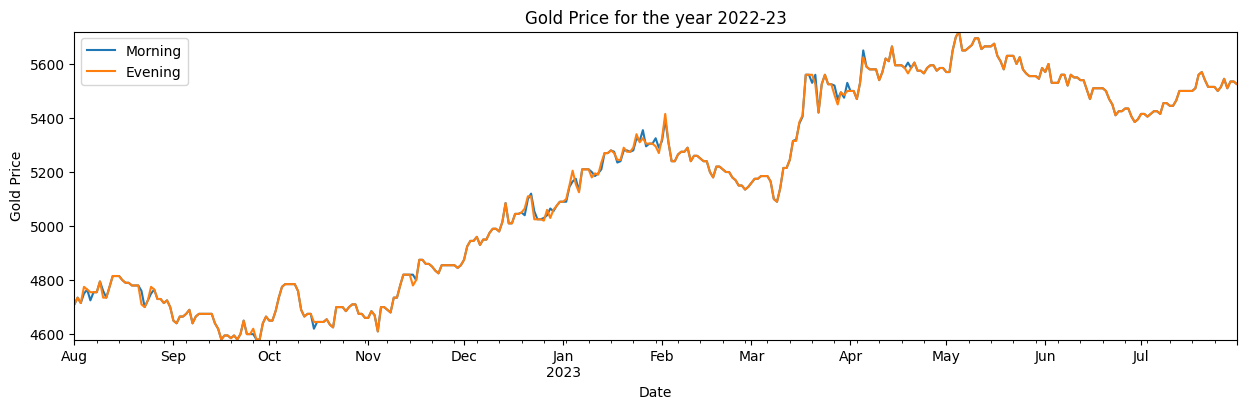

In [ ]:
min_val = min(data['Morning']['1-Aug-22':'31-Jul-23'].min(), data['Evening']['1-Aug-22':'31-Jul-23'].min())
max_val = max(data['Morning']['1-Aug-22':'31-Jul-23'].max(), data['Evening']['1-Aug-22':'31-Jul-23'].max())

data.plot(xlim=['1-Aug-22','31-Jul-23'],ylim=[min_val,max_val],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for the year 2022-23")

Text(0.5, 1.0, 'Gold Price for the year 2023-24')

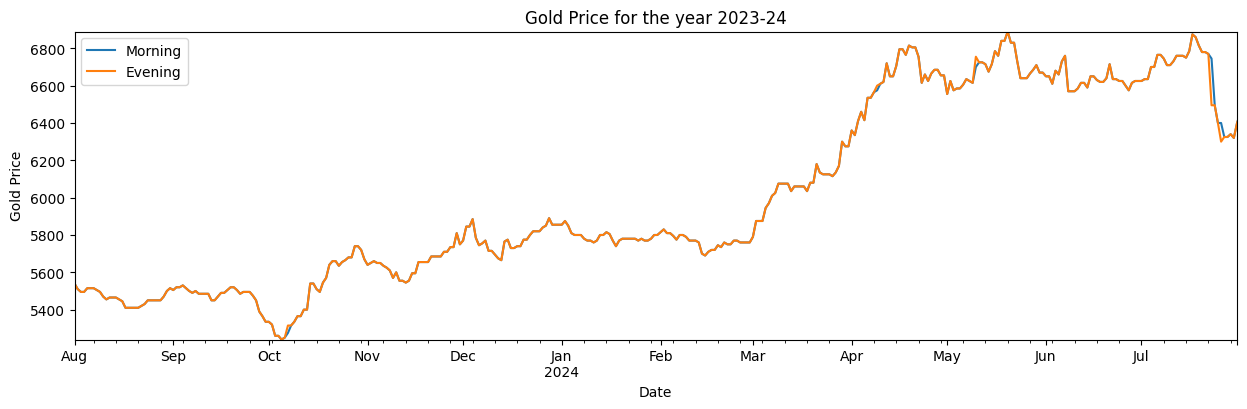

In [ ]:
min_val = min(data['Morning']['1-Aug-23':'31-Jul-24'].min(), data['Evening']['1-Aug-23':'31-Jul-24'].min())
max_val = max(data['Morning']['1-Aug-23':'31-Jul-24'].max(), data['Evening']['1-Aug-23':'31-Jul-24'].max())

data.plot(xlim=['1-Aug-23','31-Jul-24'],ylim=[min_val,max_val],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for the year 2023-24")

Text(0.5, 1.0, 'Gold Price for the year 2024')

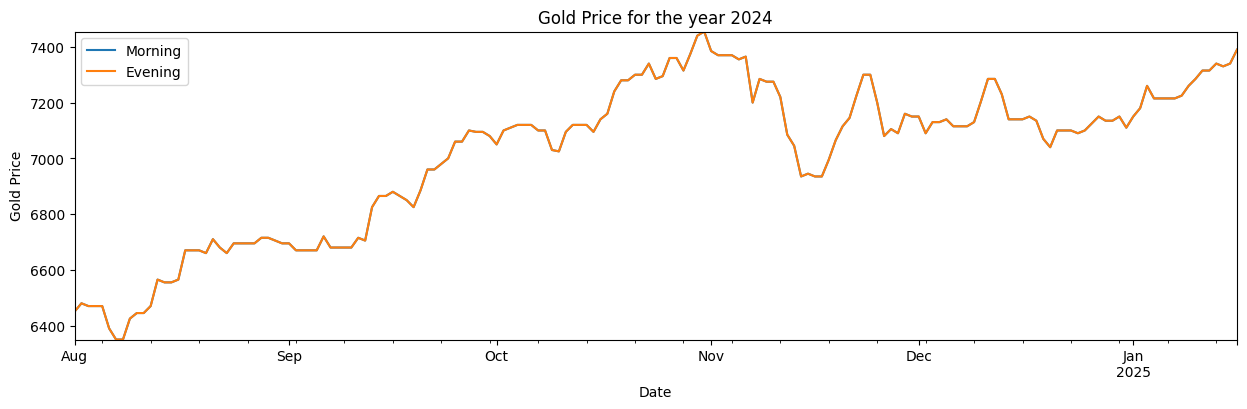

In [ ]:
x_max = '16-Jan-25'
min_val = min(data['Morning']['1-Aug-24':x_max].min(), data['Evening']['1-Aug-24':x_max].min())
max_val = max(data['Morning']['1-Aug-24':x_max].max(), data['Evening']['1-Aug-24':x_max].max())

data.plot(xlim=['1-Aug-24','16-Jan-25'],ylim=[min_val,max_val],figsize=(15,4))
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price for the year 2024")

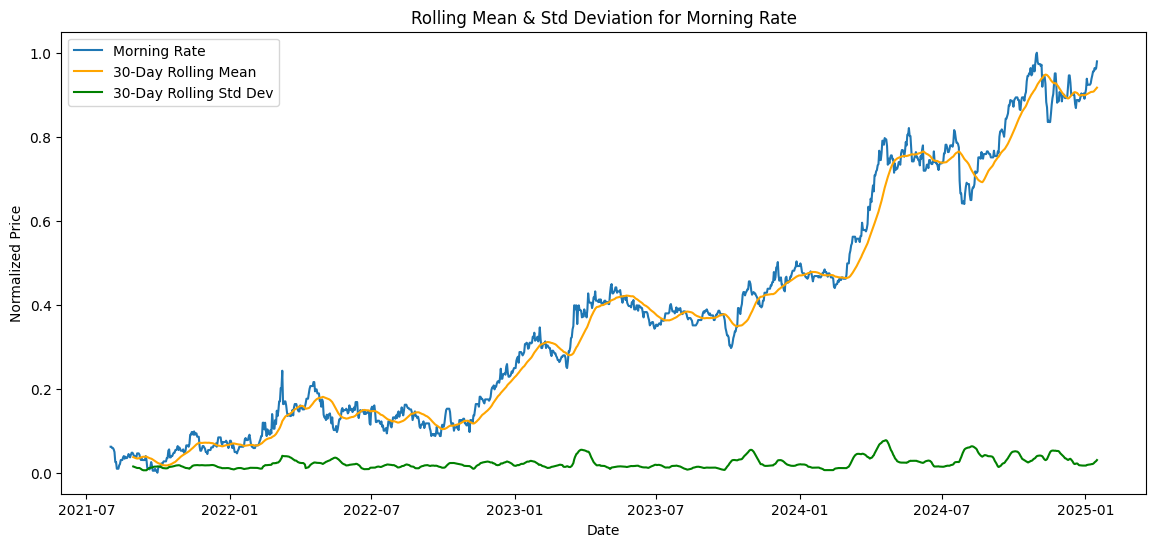

In [ ]:
normalized_data = data.copy()

min_morning = normalized_data['Morning'].min()
max_morning = normalized_data['Morning'].max()
min_evening = normalized_data['Evening'].min()
max_evening = normalized_data['Evening'].max()

normalized_data['Morning'] = (normalized_data['Morning'] - min_morning) / (max_morning - min_morning)
normalized_data['Evening'] = (normalized_data['Evening'] - min_evening) / (max_evening - min_evening)

# ROLLING MEAN
'''
My understanding : If you see the graph of the actual data is continuously fluctuating, we could not infer any useful information from that.
But while in the case of rolling mean the fluctuations are less and we could infer the trend in a better way.

It smoothens out short-term fluctuations in the data, helping to highlight trends.

Applications:
Smoothing Time Series: Reducing noise to reveal trends.
Trend Analysis: Observing how averages change over time.
Anomaly Detection: Comparing rolling averages to identify sudden deviations.

By focusing on subsets, rolling means provide more localized and dynamic insights into time series data.

(1) Noise Reduction :
Time series data often contains short-term : fluctuations, noise and volatility  caused by randomness, measurement errors, or temporary spikes.
The rolling mean smooths out these fluctuations, making it easier to identify underlying patterns or trends.
Stock Market Analysis: In stock price data, short-term volatility can obscure trends. A rolling mean highlights the general direction of the market,
                       helping investors make informed decisions.

(2) Trend Identification :
Trends in time series data are not always apparent due to variability. The rolling mean provides a clearer view of upward or downward trends by averaging values
over a specified window.
Climate Data: Analyzing temperature trends over decades to study climate change requires removing seasonal variations using a rolling mean.

(3) Localized Analysis :
The rolling mean focuses on a subset of data points (the window), enabling localized analysis of recent behavior without considering the entire dataset.
It is especially useful when the behavior of interest changes over time.
Sales Forecasting: To analyze weekly sales trends while ignoring daily fluctuations.

(4) Anomaly Detection :
By comparing raw data points to their rolling mean, you can identify outliers or anomalies that deviate significantly from normal patterns.
Network Traffic Monitoring: Detecting unusual spikes or dips in traffic that may indicate potential issues or attacks.

(5) Seasonal Adjustment :
Rolling means help remove seasonality (recurrent patterns over a fixed period) to analyze long-term trends.
Retail Data Analysis: Studying long-term growth trends by removing weekly or monthly sales spikes due to holidays or promotions.

6. Data Smoothing for Machine Learning
Smoothing data before feeding it into machine learning models can improve performance by reducing overfitting caused by noise.
Predictive Modeling: Preprocessing noisy sensor data for predictive maintenance in industrial equipment.
'''

# ROLLING STANDARD DEVIATION
'''
The rolling standard deviation calculates the standard deviation (a measure of variability or dispersion) over a rolling window of 30 days.
For each day, it provides an estimate of how much the values fluctuate around their mean in the past 30 days.
'''

rolling_window = 30  # size of the rolling window is 30 as there are 30 days in a month

normalized_data['Morning_RollingMean'] = normalized_data['Morning'].rolling(window=rolling_window).mean()
normalized_data['Morning_RollingStd'] = normalized_data['Morning'].rolling(window=rolling_window).std()

plt.figure(figsize=(14, 6))
plt.plot(normalized_data['Morning'], label='Morning Rate')
plt.plot(normalized_data['Morning_RollingMean'], label='30-Day Rolling Mean', color='orange')
plt.plot(normalized_data['Morning_RollingStd'], label='30-Day Rolling Std Dev', color='green')
plt.title("Rolling Mean & Std Deviation for Morning Rate")
plt.xlabel("Date")
plt.ylabel("Normalized Price")

plt.legend()
plt.show()



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
'''
Purpose: Decomposes the time series (data['Morning']) into its individual components:
Trend: The long-term movement in the data.
Seasonal: The repeating patterns over specific intervals (e.g., daily, monthly).
Residual: The remaining part of the data after removing the trend and seasonal components (random noise or unexplained variation).
'''

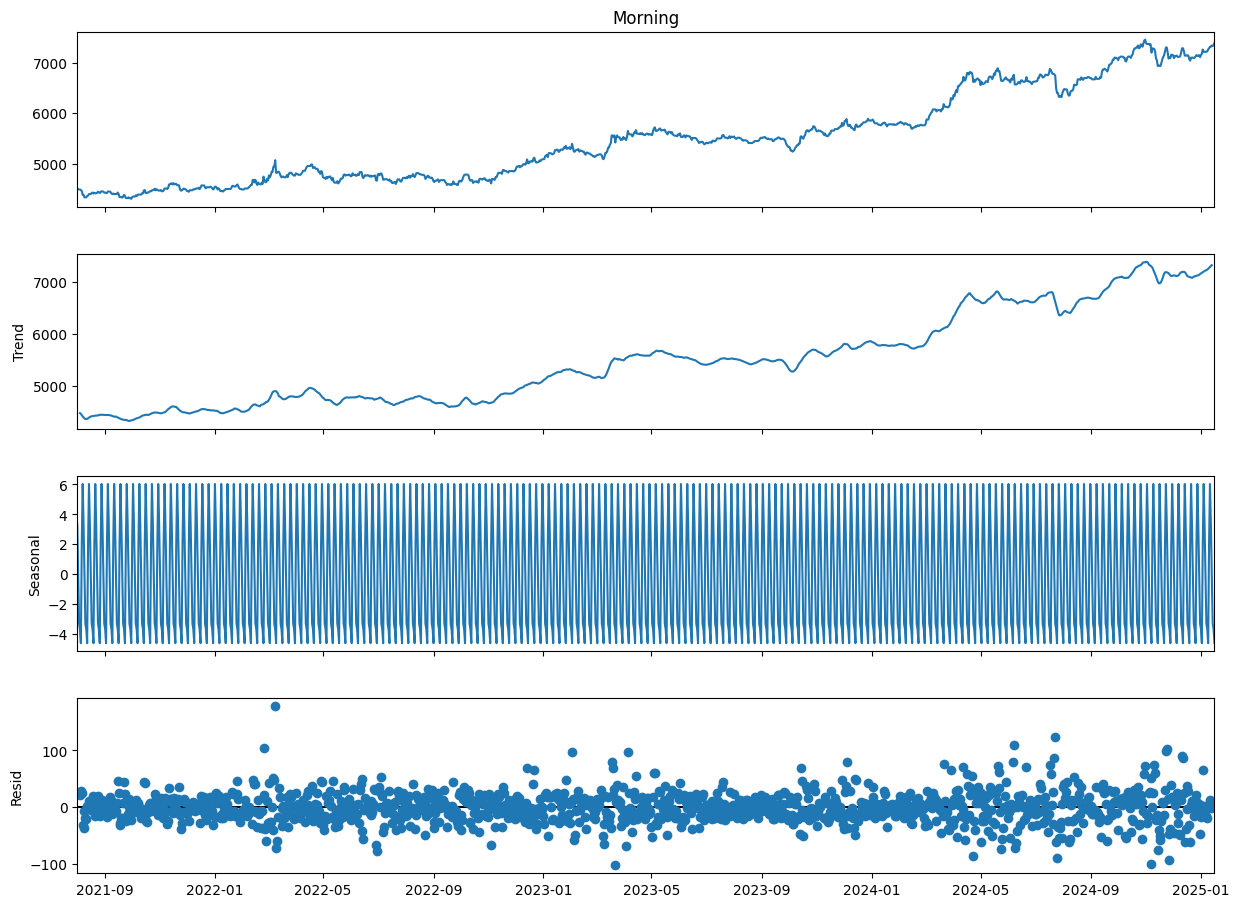

In [ ]:
# Y(t) = Trend(t) + Seasonal(t) + Residual(t)
decomposition = sm.tsa.seasonal_decompose(data['Morning'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

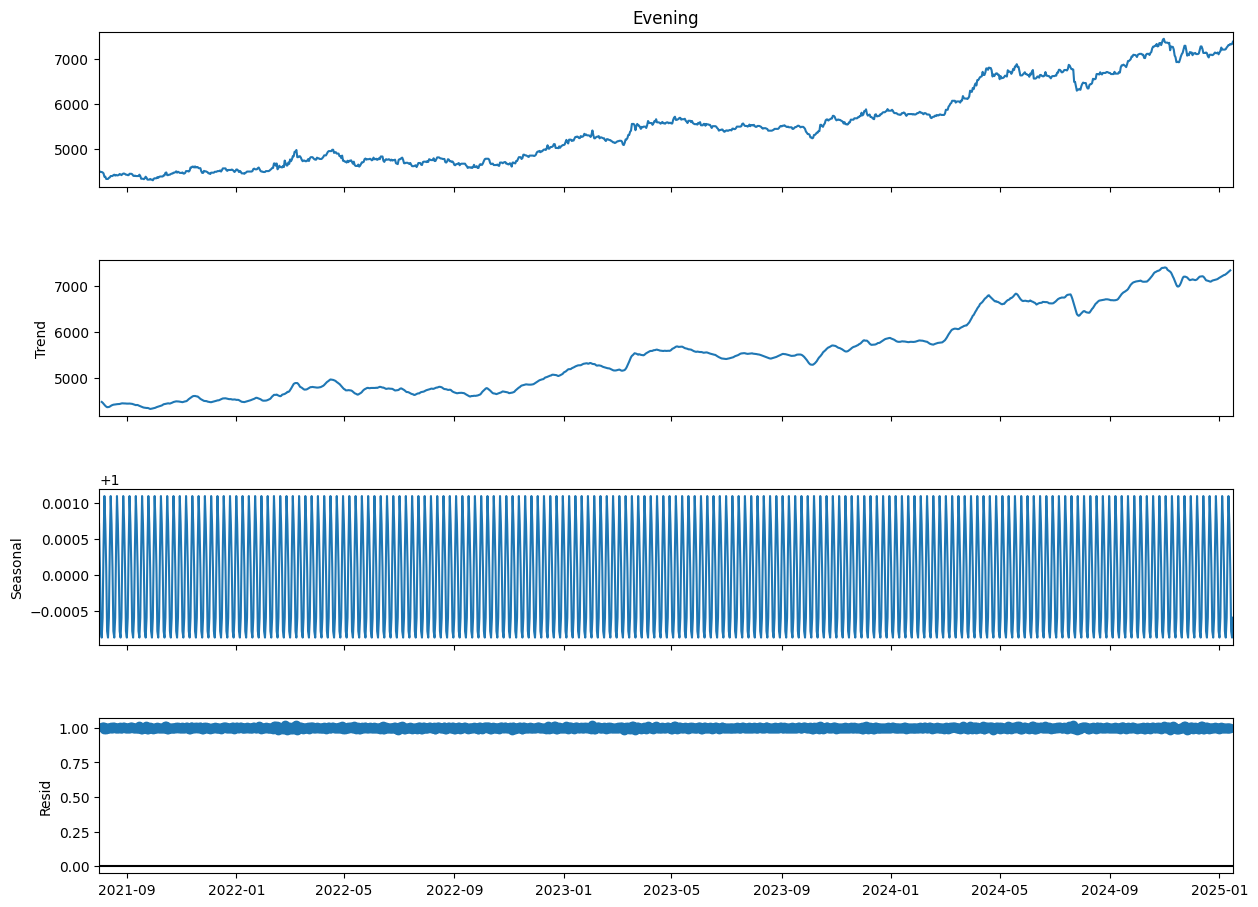

In [ ]:
# Y(t) = Trend(t) × Seasonal(t) × Residual(t)
decomposition = sm.tsa.seasonal_decompose(data['Evening'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

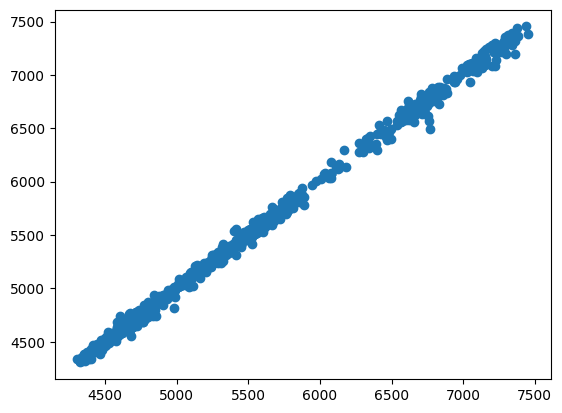

In [ ]:
plt.scatter(data.iloc[:-1,1],data.iloc[1:,1]) #yt versus yt-1

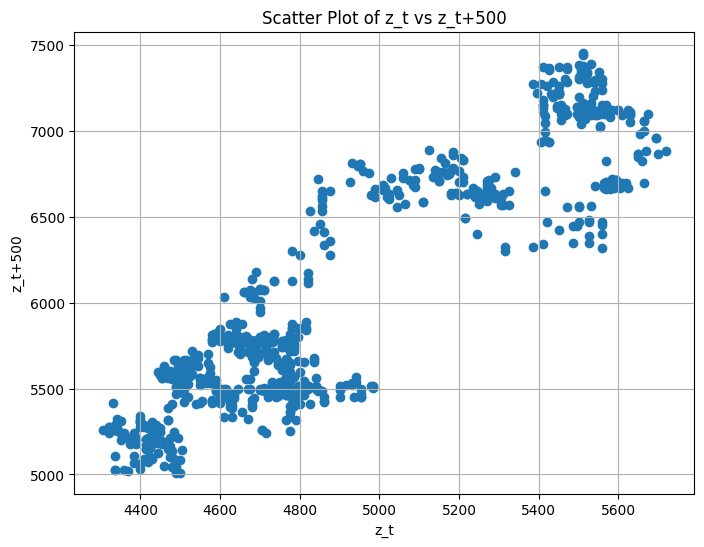

In [ ]:
'''
For a stationary process that the nature of the joint probability distribution
𝑝(𝑧 𝑡, 𝑧 𝑡+𝑘) of values separated by 𝑘 intervals of time can be inferred by plotting a scatter
diagram using pairs of values(𝑧 𝑡, 𝑧 𝑡+𝑘) of the time series, separated by a constant interval or
lag k
'''

lag_k = 500

z_t = data.iloc[:-lag_k,1]  # Excluding the last 'k' values
z_t_k = data.iloc[lag_k:,1]  # Excluding the first 'k' values

plt.figure(figsize=(8, 6))
plt.scatter(z_t, z_t_k)
# plt.scatter(z_t, z_t_k, alpha=1, color='blue')
# alpha for transparency of the points in scatter plot
'''
Helps in visualizing overlapping points.
Reduces clutter in dense scatter plots.
Makes patterns or clusters in the data more distinguishable.
'''

plt.title(f"Scatter Plot of z_t vs z_t+{lag_k}")
plt.xlabel("z_t")
plt.ylabel(f"z_t+{lag_k}")
plt.grid(True)
plt.show()


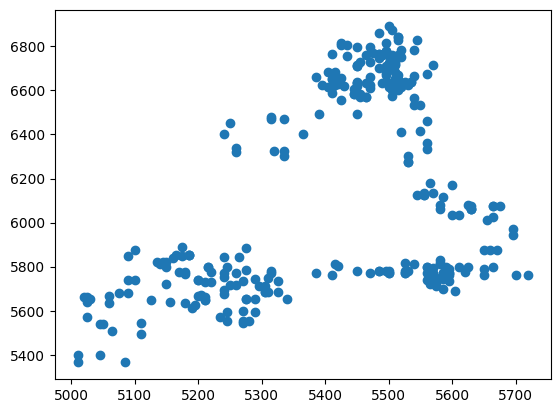

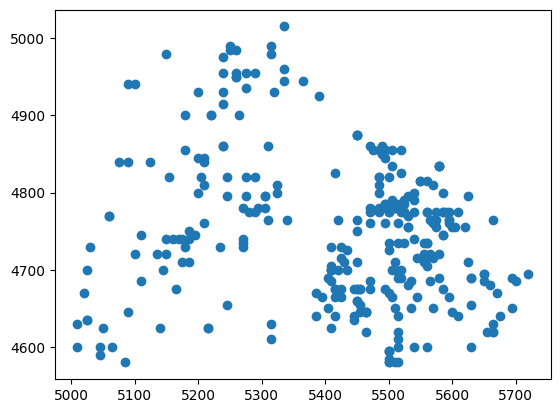

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[500:800,1],data.iloc[500+300:800+300,1])
plt.show()
plt.scatter(data.iloc[500:800,1],data.iloc[500-300:800-300,1])


In [ ]:
print(data.iloc[:-1,1].mean())
print(data.iloc[1:,1].mean())
#yt vs yt-1

5371.535532994923
5373.955160744501


Date
2021-08-30    4422.000000
2021-08-31    4419.666667
2021-09-01    4417.333333
2021-09-02    4415.000000
2021-09-03    4412.666667
                 ...     
2025-01-12    7165.333333
2025-01-13    7172.000000
2025-01-14    7178.333333
2025-01-15    7185.000000
2025-01-16    7193.000000
Name: Evening, Length: 1236, dtype: float64 Date
2021-08-30    46.878419
2021-08-31    44.546244
2021-09-01    41.950984
2021-09-02    39.653673
2021-09-03    37.063164
                ...    
2025-01-12    71.570237
2025-01-13    78.142222
2025-01-14    83.007409
2025-01-15    87.720166
2025-01-16    95.055338
Name: Evening, Length: 1236, dtype: float64


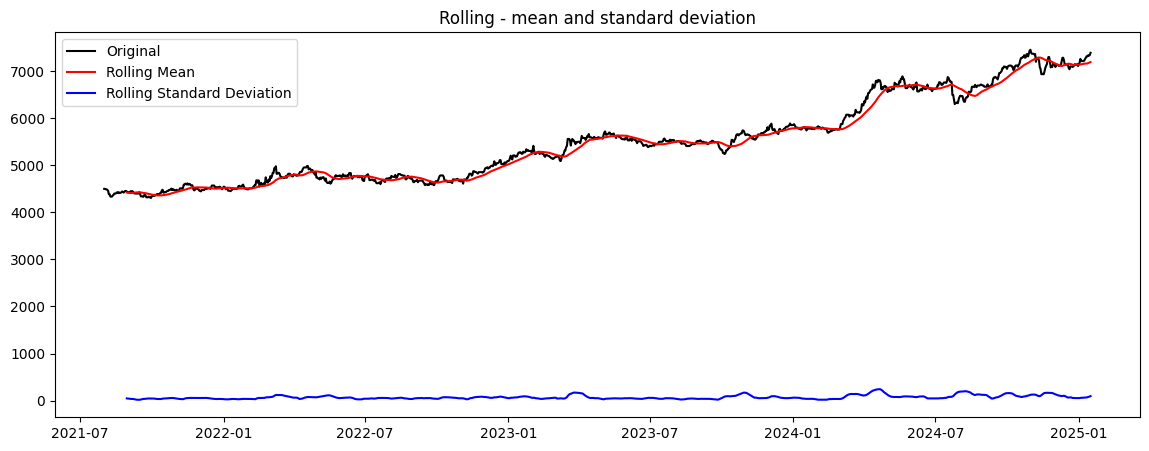

In [ ]:
rmean = data['Evening'].rolling(window=30).mean().dropna()
rstd = data['Evening'].rolling(window=30).std().dropna()
print(rmean,rstd)

plt.figure(figsize=(14,5))

plt.plot(data['Evening'], label='Original', color='black')
plt.plot(rmean, label='Rolling Mean', color='red',)
plt.plot(rstd, label = 'Rolling Standard Deviation', color='blue')

plt.title("Rolling - mean and standard deviation")
plt.legend(loc='best')
plt.show()

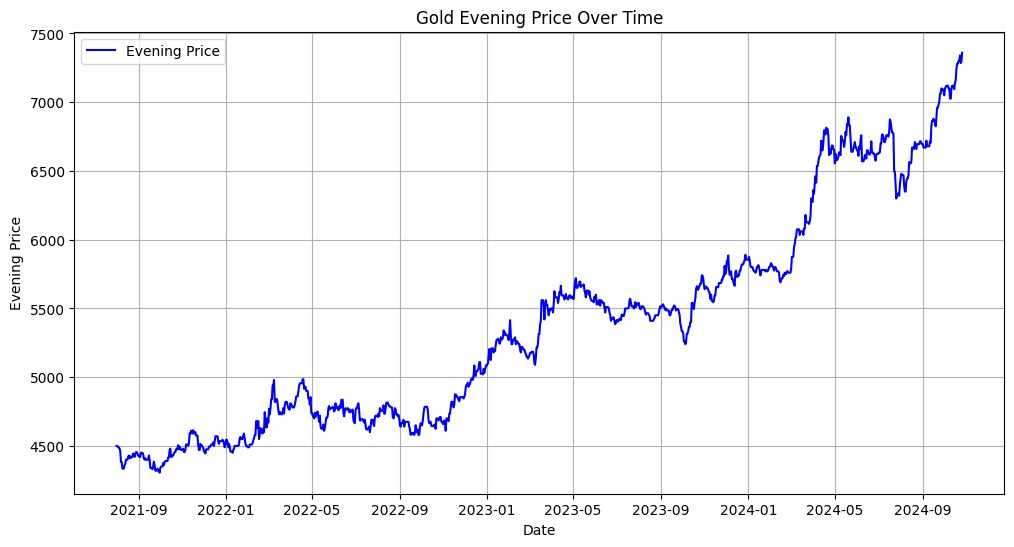

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Evening'], color='blue', label='Evening Price')
plt.title('Gold Evening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Evening Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Autocorrelation (also called serial correlation) is a measure of the relationship between a time series and a lagged version of itself.
It quantifies how values in a time series at one in time are related to values at another point in time.

Correlation : Measures the relationship between two variables.
Autocorrelation : Measures the relationship between a variable and itself at different time lags.

ACF: Identify the presence of patterns and determine MA terms in ARIMA models.
PACF: Identify the direct effect of past values and determine AR terms in ARIMA models.

AR(p)
MA(q)
ARMA(p,q)

From the graph itself we can check the stationarity of the time series data. If the ACF gradually decreases then we can say that the data is not stationary.
Spikes out of the Significance region in ACF and PACF plots of the stationary time series data are the orders of MA and AR models respectively.

How PACF doesn't include intermediate lags while ACF does?
Why PACF-AR and ACF-MA
'''

"\nAutocorrelation (also called serial correlation) is a measure of the relationship between a time series and a lagged version of itself. \nIt quantifies how values in a time series at one in time are related to values at another point in time.\n\nCorrelation : Measures the relationship between two variables.\nAutocorrelation : Measures the relationship between a variable and itself at different time lags.\n\nACF: Identify the presence of patterns and determine MA terms in ARIMA models.\nPACF: Identify the direct effect of past values and determine AR terms in ARIMA models.\n\nAR(p)\nMA(q)\nARMA(p,q)\n\nFrom the graph itself we can check the stationarity of the time series data. If the ACF gradually decreases then we can say that the data is not stationary.\nSpikes out of the Significance region in ACF and PACF plots of the stationary time series data are the orders of MA and AR models respectively.  \n\nHow PACF doesn't include intermediate lags while ACF does?\nWhy PACF-AR and ACF-M

<Figure size 1200x600 with 0 Axes>

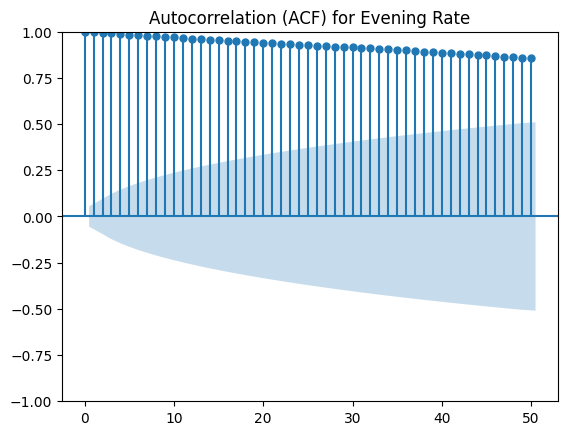

<Figure size 1200x600 with 0 Axes>

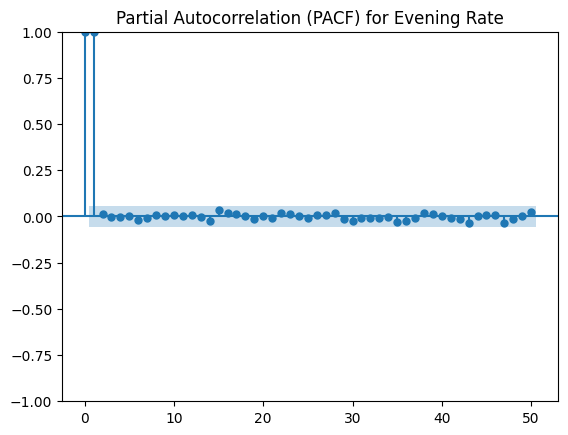

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(data['Evening'], lags=50)
plt.title("Autocorrelation (ACF) for Evening Rate")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Evening'], lags=50)
plt.title("Partial Autocorrelation (PACF) for Evening Rate")
plt.show()

In [ ]:
#ADF - Adjusted Dickey-Fuller Test
#KPSS - Kwiatkowski-Phillips-Schmidt-Shin

In [46]:
import pandas as pd
data['Evening_Differenced_1'] = [None] * len(data)
for i in range(1, len(data)):
    data.iloc[i,-1] = data.iloc[i,1] - data.iloc[i-1,1]
print(data)

            Morning  Evening Evening_Differenced_1
Date                                              
2021-08-01     4500     4500                  None
2021-08-02     4500     4500                     0
2021-08-03     4490     4490                   -10
2021-08-04     4490     4490                     0
2021-08-05     4480     4480                   -10
...             ...      ...                   ...
2025-01-12     7315     7315                     0
2025-01-13     7340     7340                    25
2025-01-14     7330     7330                   -10
2025-01-15     7340     7340                    10
2025-01-16     7390     7390                    50

[1265 rows x 3 columns]


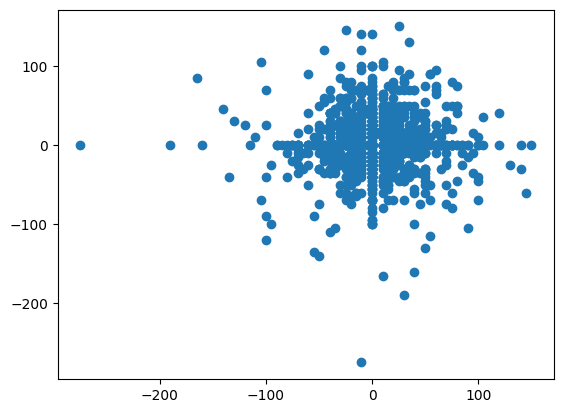

In [ ]:
plt.scatter(data.iloc[1:-1,-1],data.iloc[2:,-1]) #yt versus yt-1

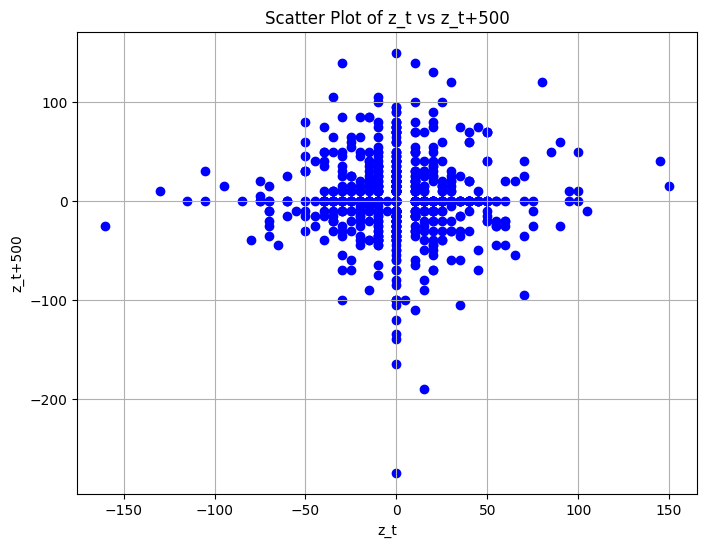

In [ ]:
lag_k = 500

z_t = data.iloc[1:-lag_k,-1]  # Excluding the last 'k' values
z_t_k = data.iloc[lag_k:-1,-1]  # Excluding the first 'k' values

plt.figure(figsize=(8, 6))
plt.scatter(z_t, z_t_k, color='blue')

plt.title(f"Scatter Plot of z_t vs z_t+{lag_k}")
plt.xlabel("z_t")
plt.ylabel(f"z_t+{lag_k}")
plt.grid(True)
plt.show()


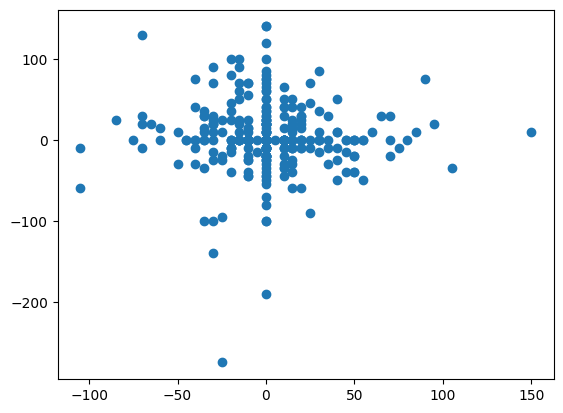

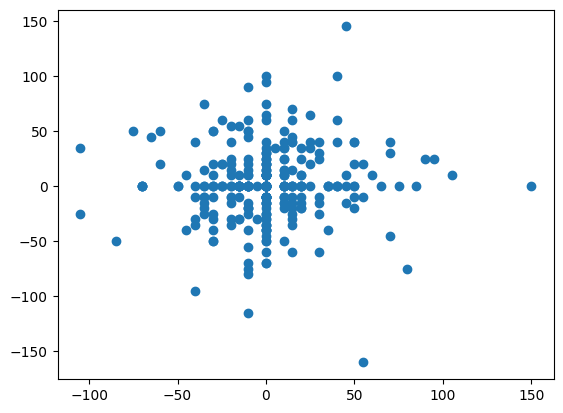

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[500:800,-1],data.iloc[500+300:800+300,-1])
plt.show()
plt.scatter(data.iloc[500:800,-1],data.iloc[500-300:800-300,-1])


In [ ]:
print(data.iloc[1:-1,-1].mean())
print(data.iloc[2:,-1].mean())
#yt vs yt-1

2.3666384419983064
2.421676545300593


Text(0.5, 1.0, 'Rolling mean and standard deviation')

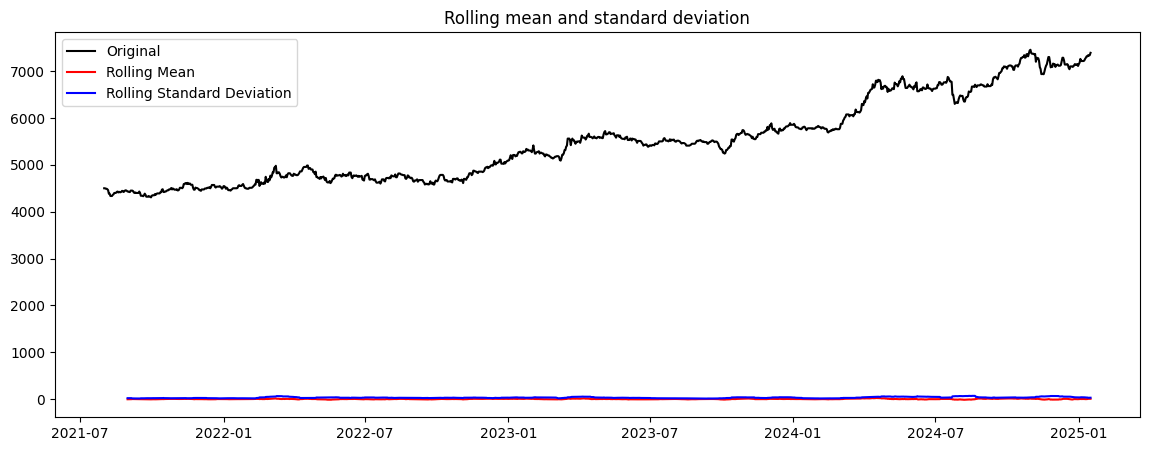

In [ ]:
rmean = data.iloc[1:,-1].rolling(window=30).mean().dropna()
rstd = data.iloc[1:,-1].rolling(window=30).std().dropna()
#print(rmean,rstd)

plt.figure(figsize=(14,5))

plt.plot(data['Evening'] , color='black',label='Original')
plt.plot(rmean , color='red',label='Rolling Mean')
plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
#plt.show(block=False)

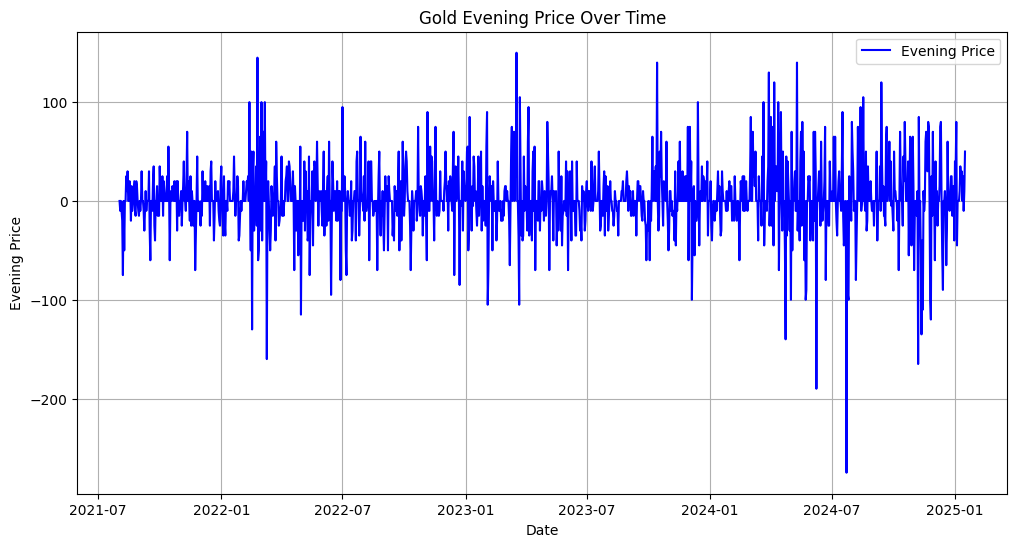

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Evening_Differenced_1'], color='blue', label='Evening Price')
plt.title('Gold Evening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Evening Price')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

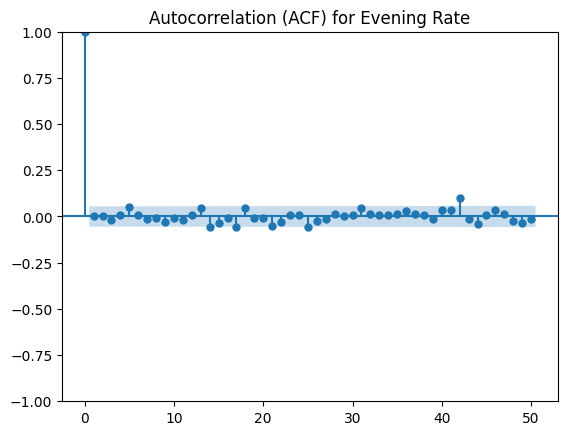

<Figure size 1200x600 with 0 Axes>

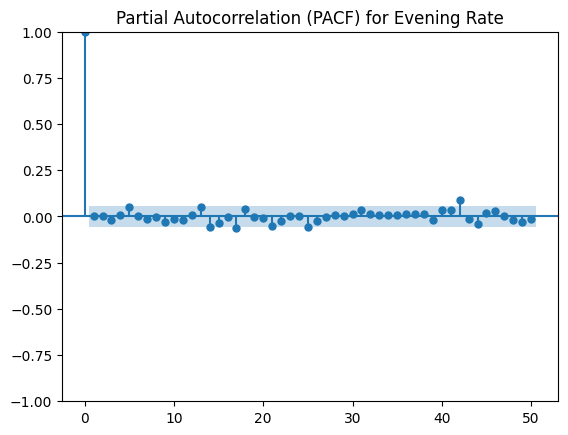

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_acf(data.iloc[1:,-1], lags=50)
plt.title("Autocorrelation (ACF) for Evening Rate")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data.iloc[1:,-1], lags=50)
plt.title("Partial Autocorrelation (PACF) for Evening Rate")
plt.show()

In [47]:
train_data = data.iloc[1:-30]
test_data = data.iloc[-30:]

print(len(train_data),len(test_data),len(data))

1234 30 1265


In [ ]:
'''
p (Autoregressive Order): Determined using the Partial Autocorrelation Function (PACF) plot. Look for where the PACF plot cuts off.

q (Moving Average Order): Determined using the Autocorrelation Function (ACF) plot. Look for where the ACF plot cuts off.

d (Differencing Order): Determined by checking for stationarity (e.g., using the ADF test or KPSS test). Difference the data until it becomes stationary.
'''

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_series = pd.to_numeric(train_data['Evening_Differenced_1'], errors='coerce').dropna() # train_data.iloc[:,-1]
train_series.index.freq = pd.infer_freq(train_series.index) # 'D

test_series = pd.to_numeric(test_data['Evening_Differenced_1'], errors='coerce').dropna() # test_data.iloc[:,-1]
test_series.index.freq = pd.infer_freq(test_series.index) # 'D

model = ARIMA(train_series, order=(1,0,1)) # order = (1, 1, 1)
arima_result = model.fit()

forecast = arima_result.forecast(steps=len(test_series))

#print(forecast)
#print(test_series)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# Model Evaluation
mae = mean_absolute_error(test_series, forecast)
mse = mean_squared_error(test_series, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_series, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

Mean Absolute Error (MAE): 22.55539579400048
Mean Squared Error (MSE): 949.670723571578
Root Mean Squared Error (RMSE): 30.81672798289231
R-squared (R2 Score): -0.19367850454162938


In [11]:
import pandas as pd
import numpy as np

original_series = train_data['Evening']

forecast_diff = forecast

last_original_value = original_series.iloc[-1]

forecast_original = [last_original_value + forecast_diff[0]]

for i in range(1, len(forecast_diff)):
    forecast_original.append(forecast_original[-1] + forecast_diff[i])

forecast_original = np.array(forecast_original)
print(forecast_original)

# Convert back to a pandas Series for convenience
forecast_original_series = pd.Series(forecast_original, index=test_series.index)
#One thing to be noted here is that earlier the yhat values and another 12 or so features also came with the forecast which is the result of arima_result.forecast(steps=len(test_series))

[7152.14846465 7154.29595255 7156.44344039 7158.59092823 7160.73841606
 7162.8859039  7165.03339174 7167.18087957 7169.32836741 7171.47585525
 7173.62334308 7175.77083092 7177.91831876 7180.0658066  7182.21329443
 7184.36078227 7186.50827011 7188.65575794 7190.80324578 7192.95073362
 7195.09822145 7197.24570929 7199.39319713 7201.54068496 7203.6881728
 7205.83566064 7207.98314848 7210.13063631 7212.27812415 7214.42561199]


<ipython-input-11-ad251be62124>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_original = [last_original_value + forecast_diff[0]]
<ipython-input-11-ad251be62124>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_original.append(forecast_original[-1] + forecast_diff[i])


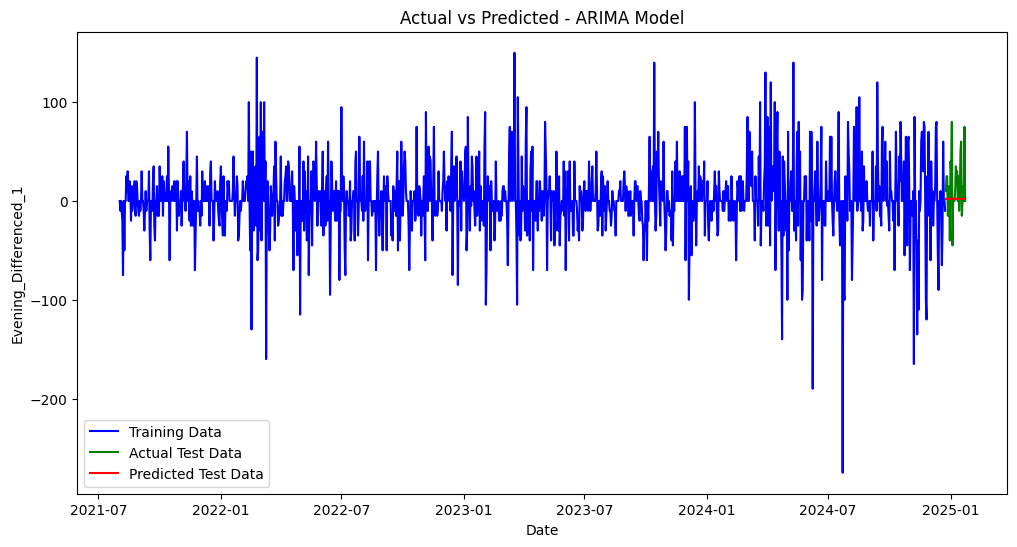

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))

plt.plot(train_series.index, train_series, label="Training Data", color='blue')
plt.plot(test_series.index, test_series, label="Actual Test Data", color='green')
plt.plot(test_series.index, forecast, label="Predicted Test Data", color='red')

plt.title("Actual vs Predicted - ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Evening_Differenced_1")
plt.legend()
plt.show()


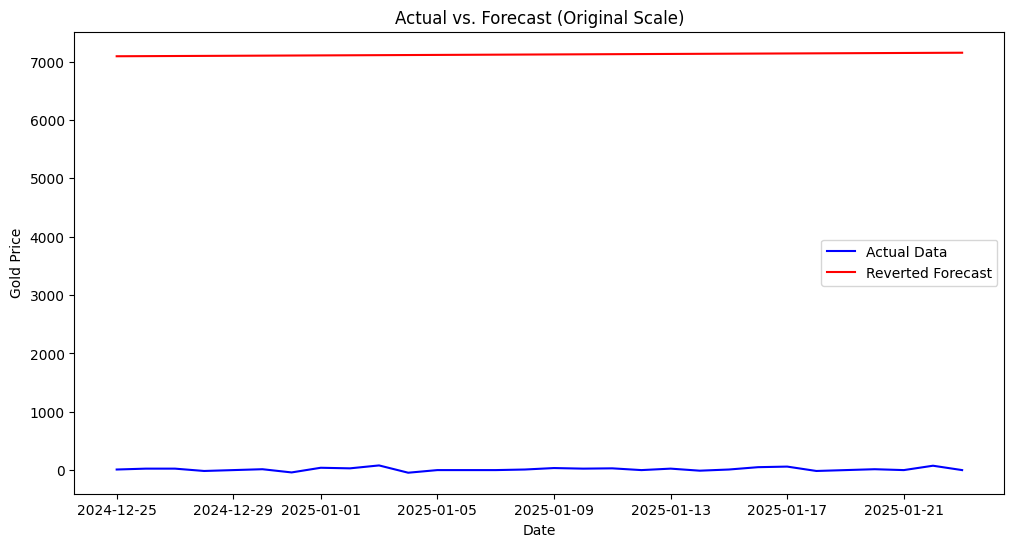

In [ ]:
# Plot the original vs. reverted forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label="Actual Data", color="blue")
plt.plot(test_series.index, forecast_original_series, label="Reverted Forecast", color="red")
plt.title("Actual vs. Forecast (Original Scale)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()


In [14]:
!pip install tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Mean Absolute Error (MAE): 22.147863483428956
Mean Squared Error (MSE): 827.3052175238341
Root Mean Squared Error (RMSE): 28.762913926162526
R-squared (R2 Score): -0.01697015061319518


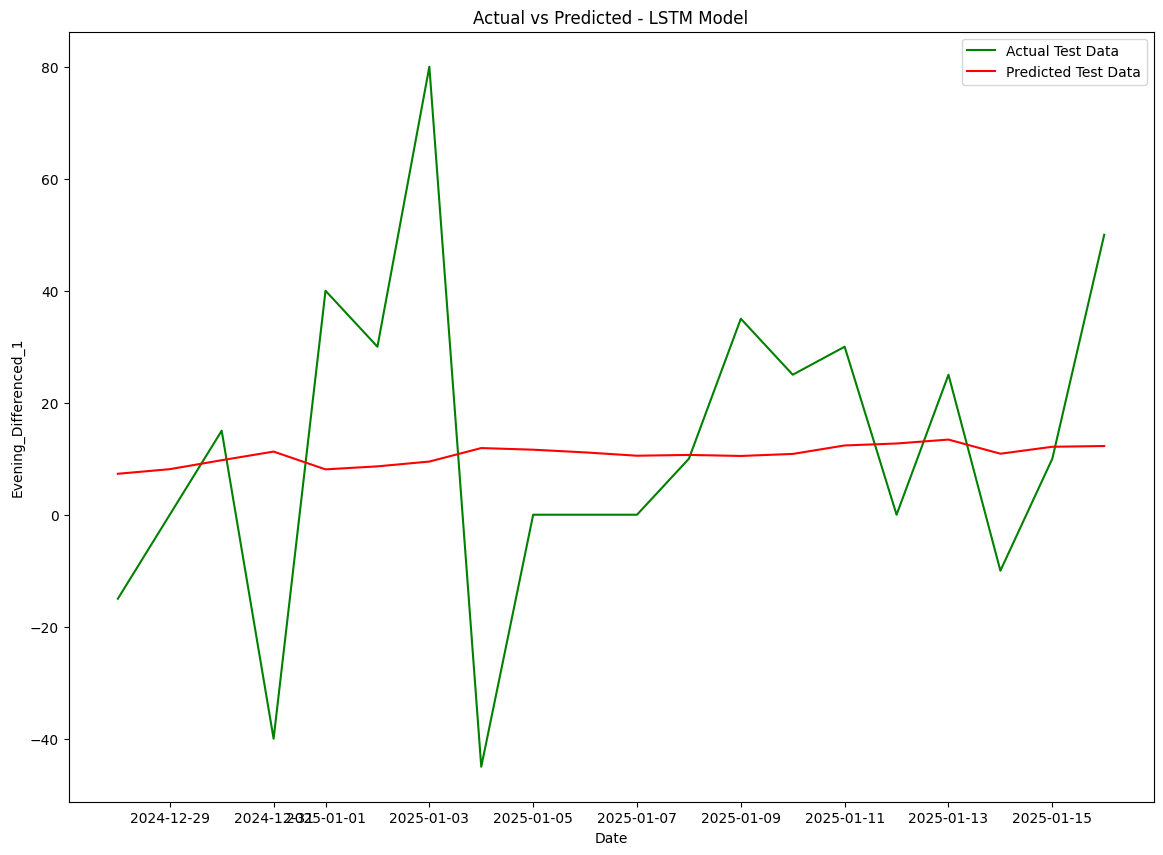

In [36]:
from tensorflow.keras.models import Sequential # Defines a linear stack of layers for the LSTM model.
from tensorflow.keras.layers import LSTM, Dense # Adds LSTM layers for capturing temporal dependencies in the data.
                                                # Fully connected layer to output a single value (forecast).
from sklearn.preprocessing import MinMaxScaler # Scales data between a specified range (0 to 1 here), which is essential for LSTM as it works better with scaled data.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

scaler = MinMaxScaler(feature_range=(0, 1)) # Class - MinMaxScaler
                                            # Object - scaler
                                            # It is a preprocessing technique to scale the data into a specified range which is 0 to 1
                                            # x_new = a + ( (b-a) * ( x_old - min(x) ) / ( max(x) - min(x) ) )

'''
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data)  # Calculates scaling parameters on train_data
train_scaled = scaler.transform(train_data)  # Applies scaling using the stored parameters
test_scaled = scaler.transform(test_data)    # Uses the same parameters to scale test_data
'''

train_series = pd.to_numeric(train_data['Evening_Differenced_1'], errors='coerce').dropna() # train_data.iloc[:,-1]
train_series.index.freq = pd.infer_freq(train_series.index) # 'D

test_series = pd.to_numeric(test_data['Evening_Differenced_1'], errors='coerce').dropna() # test_data.iloc[:,-1]
test_series.index.freq = pd.infer_freq(test_series.index) # 'D

train_scaled = scaler.fit_transform(train_series.values.reshape(-1, 1))
test_scaled = scaler.transform(test_series.values.reshape(-1, 1))
'''
Many libraries, like scikit-learn or neural network frameworks, expect the input to be a 2D array of shape (n_samples, n_features)
It is a standard preprocessing step for single-feature datasets.
-1 : Automatically determines the number of rows to maintain the array's total size.
1  : Creates a single column in the reshaped array.
'''

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 10  # Number of time steps in each sequence
x_train, y_train = create_sequences(train_scaled, seq_length)
x_test, y_test = create_sequences(test_scaled, seq_length)
'''
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
seq_length = 3

x = [[10, 20, 30],
     [20, 30, 40],
     [30, 40, 50]]

y = [40, 50, 60]
In the first sample 10, 20 and 30 are the features and the expected output is 40 which is the expected next value
'''

# Reshape input for LSTM (samples, time steps, features)
# x_train.shape[0] - ( len(train_data) - seq_length ) - number of 2d-matrices or samples
# x_train.shape[1] - seq_length or time steps         - number of data in a sequence = 10
# third is the feature which is 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=0)

# Predict on test data
predicted_scaled = model.predict(x_test)
predicted = scaler.inverse_transform(predicted_scaled)

# Actual test data (corresponding y_test values need to be scaled back) # Actually instead of calculating wecan use the test_data from above right?
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Model Evaluation
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(14,10))

plt.plot(test_series.index[seq_length:], actual, label="Actual Test Data", color='green')
plt.plot(test_series.index[seq_length:], predicted, label="Predicted Test Data", color='red')

plt.title("Actual vs Predicted - LSTM Model")
plt.xlabel("Date")
plt.ylabel("Evening_Differenced_1")
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8csjcw5/9wy4n15o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv8csjcw5/br7v5z60.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92970', 'data', 'file=/tmp/tmpv8csjcw5/9wy4n15o.json', 'init=/tmp/tmpv8csjcw5/br7v5z60.json', 'output', 'file=/tmp/tmpv8csjcw5/prophet_modely2bpzi_j/prophet_model-20250124143939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 21.755955448105567
Mean Squared Error (MSE): 875.8451830243315
Root Mean Squared Error (RMSE): 29.59468166789992
R-squared (R2 Score): 0.04902803146109502


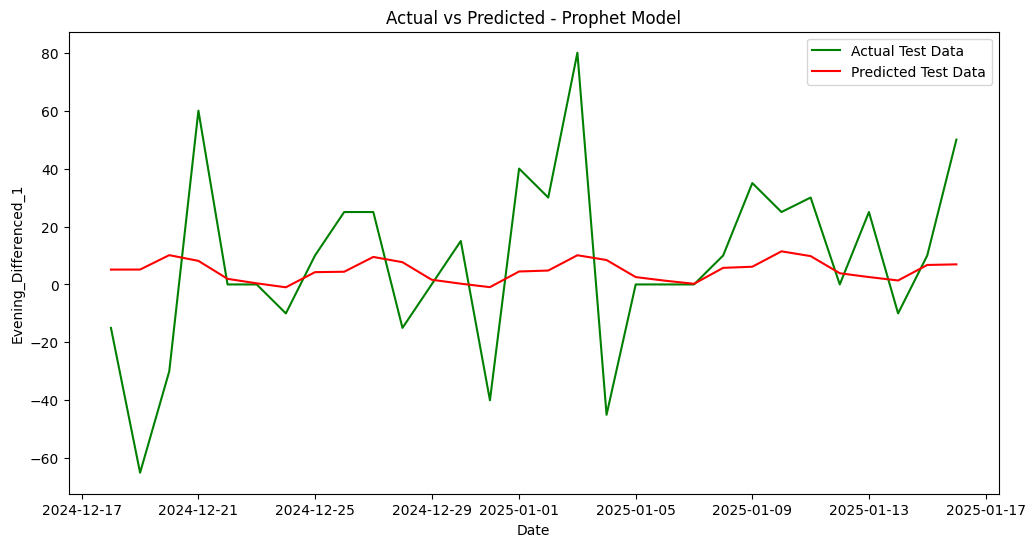

In [48]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

train_series = pd.to_numeric(train_data['Evening_Differenced_1'], errors='coerce').dropna() # train_data.iloc[:,-1]
train_series.index.freq = pd.infer_freq(train_series.index) # 'D

test_series = pd.to_numeric(test_data['Evening_Differenced_1'], errors='coerce').dropna() # test_data.iloc[:,-1]
test_series.index.freq = pd.infer_freq(test_series.index) # 'D

# Prepare the data for Prophet
train_df = train_series.reset_index()
test_df = test_series.reset_index()

# Prophet requires two columns: 'ds' for date and 'y' for the values
train_df.columns = ['ds', 'y']
test_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_df)

# Forecast for the test data period
future = pd.DataFrame({'ds': test_df['ds']})
forecast = model.predict(future)

# Extract the forecasted values
forecasted_values = forecast['yhat'].values

# Model Evaluation
mae = mean_absolute_error(test_df['y'], forecasted_values)
mse = mean_squared_error(test_df['y'], forecasted_values)
rmse = np.sqrt(mse)
r2 = r2_score(test_df['y'], forecasted_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))

plt.plot(test_df['ds'], test_df['y'], label="Actual Test Data", color='green')
plt.plot(test_df['ds'], forecasted_values, label="Predicted Test Data", color='red')

plt.title("Actual vs Predicted - Prophet Model")
plt.xlabel("Date")
plt.ylabel("Evening_Differenced_1")
plt.legend()
plt.show()

# Prophet's built-in plot
#model.plot(forecast)
#plt.title("Prophet Forecast with Components")
#plt.show()


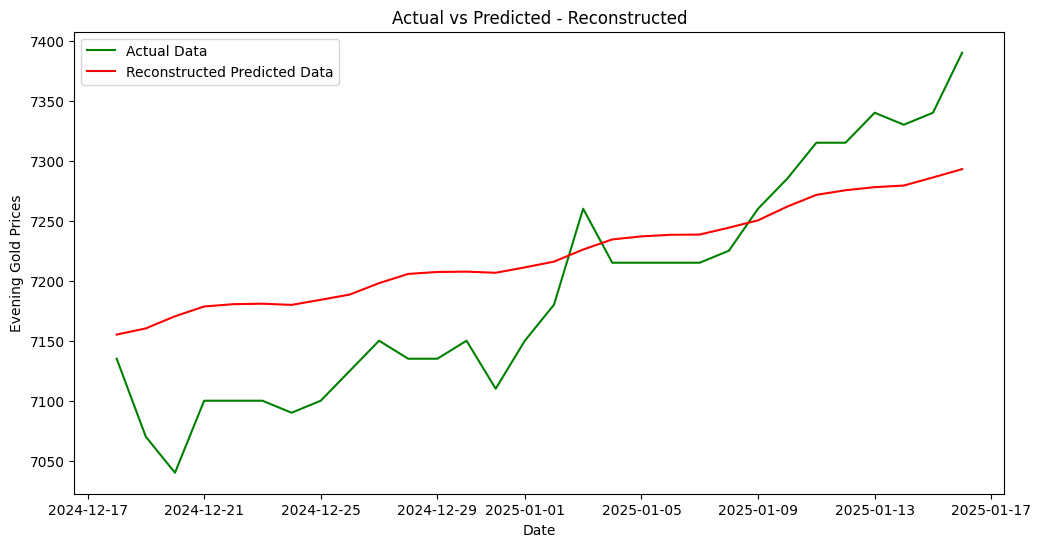

In [41]:
# Get the last known value from the training dataset
last_original_value = train_data['Evening'].iloc[-1]

# Reconstruct the forecasted original values
reconstructed_forecast = [last_original_value]  # Initialize with the last original value
for diff_value in forecasted_values:
    next_value = reconstructed_forecast[-1] + diff_value
    reconstructed_forecast.append(next_value)

# Remove the initial value as it's only for reconstruction
reconstructed_forecast = reconstructed_forecast[1:]

# Convert to a pandas DataFrame for easier plotting
reconstructed_df = pd.DataFrame({
    'ds': test_df['ds'],
    'actual': test_data['Evening'].values,  # Original test data
    'predicted': reconstructed_forecast
})

# Plot Actual vs Reconstructed
plt.figure(figsize=(12, 6))
plt.plot(reconstructed_df['ds'], reconstructed_df['actual'], label="Actual Data", color='green')
plt.plot(reconstructed_df['ds'], reconstructed_df['predicted'], label="Reconstructed Predicted Data", color='red')
plt.title("Actual vs Predicted - Reconstructed")
plt.xlabel("Date")
plt.ylabel("Evening Gold Prices")
plt.legend()
plt.show()


In [49]:
print(reconstructed_df)

           ds  actual    predicted
0  2024-12-18    7135  7155.125134
1  2024-12-19    7070  7160.270145
2  2024-12-20    7040  7170.382431
3  2024-12-21    7100  7178.525306
4  2024-12-22    7100  7180.459860
5  2024-12-23    7100  7180.846143
6  2024-12-24    7090  7179.862667
7  2024-12-25    7100  7184.105517
8  2024-12-26    7125  7188.493531
9  2024-12-27    7150  7197.989173
10 2024-12-28    7135  7205.668859
11 2024-12-29    7135  7207.304516
12 2024-12-30    7150  7207.564466
13 2024-12-31    7110  7206.632626
14 2025-01-01    7150  7211.107350
15 2025-01-02    7180  7215.906341
16 2025-01-03    7260  7225.987321
17 2025-01-04    7215  7234.418183
18 2025-01-05    7215  7236.958442
19 2025-01-06    7215  7238.260096
20 2025-01-07    7215  7238.486876
21 2025-01-08    7225  7244.213230
22 2025-01-09    7260  7250.329483
23 2025-01-10    7285  7261.762853
24 2025-01-11    7315  7271.548056
25 2025-01-12    7315  7275.409315
26 2025-01-13    7340  7277.961863
27 2025-01-14    733